### 累乗近似でad値と壁からの距離を算出する関数を推定



In [1]:
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math

def target_func(x, a, b):
    return a * x**b

In [2]:
# ログ用csvファイルの読み込み

path = "C:/Users/qtfdl/Desktop/log5.csv"
csv_data = np.loadtxt(path, delimiter=",", dtype = float, skiprows=1)

TIMESTAMP_COL = 0
D_LA_COL = 23
D_RA_COL = 26
WALL_LA_COL = 27
WALL_RA_COL = 30
THREE_SECTION_AHEAD_DIST_COL = 52

timestamp = csv_data[:, TIMESTAMP_COL]
d_la = csv_data[:, D_LA_COL]
d_ra = csv_data[:, D_RA_COL]
wall_la = csv_data[:, WALL_LA_COL]
wall_ra = csv_data[:, WALL_RA_COL]
three_section_ahead_dist = csv_data[:, THREE_SECTION_AHEAD_DIST_COL]

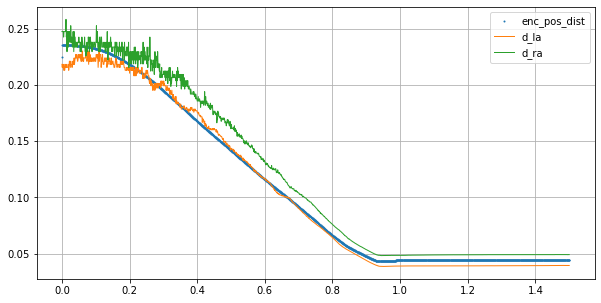

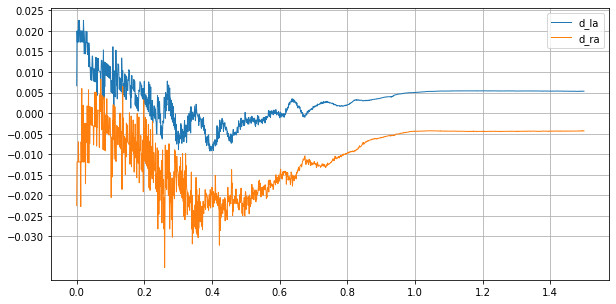

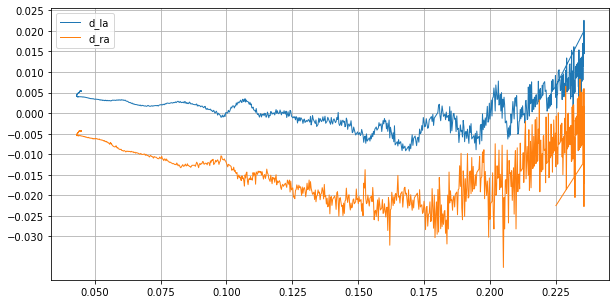

In [3]:
# ログの前壁距離とエンコーダー計測位置の比較

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(timestamp, three_section_ahead_dist,lw=0,marker='o',clip_on=False, ms=1, label="enc_pos_dist")
plt.plot(timestamp, d_la, lw=1, label="d_la")
plt.plot(timestamp, d_ra, lw=1, label="d_ra")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.grid()
plt.yticks(np.arange(-0.03, 0.08, step=0.005))
plt.plot(timestamp, three_section_ahead_dist - d_la, lw=1, label="d_la")
plt.plot(timestamp, three_section_ahead_dist - d_ra, lw=1, label="d_ra")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.grid()
plt.yticks(np.arange(-0.03, 0.08, step=0.005))
plt.plot(three_section_ahead_dist, three_section_ahead_dist - d_la, lw=1, label="d_la")
plt.plot(three_section_ahead_dist, three_section_ahead_dist - d_ra, lw=1, label="d_ra")
plt.legend()
plt.show()



[ 0.8469867  -0.43683973]
param write ar_dist_coef_a 0.8469866976451726
param write ar_dist_coef_b -0.43683972666212706


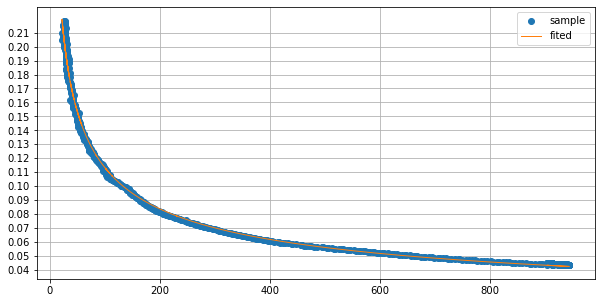

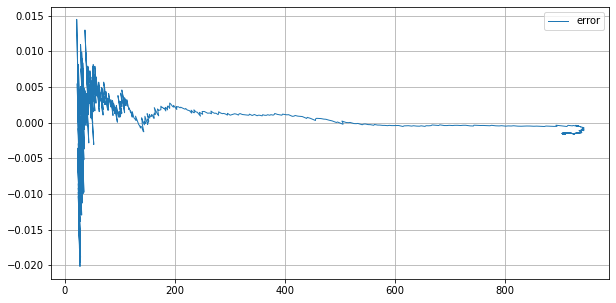

In [4]:
##########################
x = wall_ra[200:]
y = three_section_ahead_dist[200:]

p_opt, cov = curve_fit(target_func, x, y, maxfev=100000)
print(p_opt)
print("param write ar_dist_coef_a " + str(p_opt[0]))
print("param write ar_dist_coef_b " + str(p_opt[1]))


y_fit = np.vectorize(target_func)

plt.figure(figsize=(10,5))
plt.yticks(np.arange(-0.22, 0.22, step=0.01))
plt.grid()
plt.plot(x,y,lw=0,marker='o',clip_on=False, label="sample")
plt.plot(x,y_fit(x,*p_opt),lw=1, label="fited")

plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.yticks(np.arange(-0.03, 0.03, step=0.005))
plt.grid()
plt.plot(x,y_fit(x,*p_opt)-y,lw=1, label="error")

plt.legend()
plt.show()



[ 1.076454   -0.44342348]
param write al_dist_coef_a 1.0764540043294695
param write al_dist_coef_b -0.44342347726785497


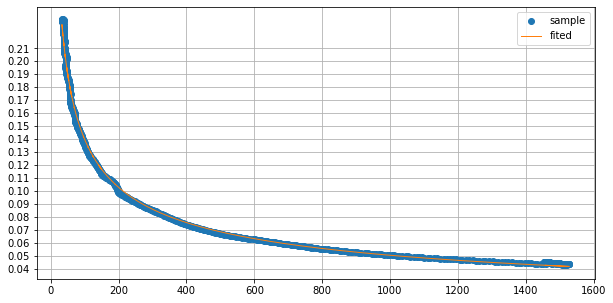

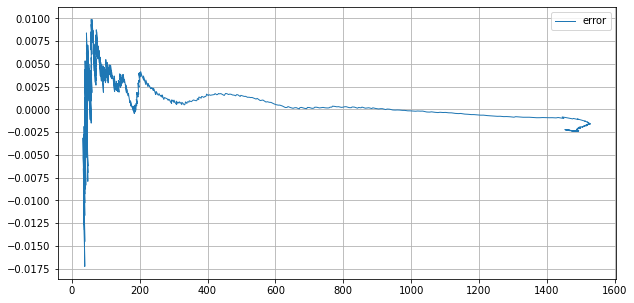

In [5]:
# AD値からfitting係数算出
x = wall_la[100:]
y = three_section_ahead_dist[100:]

p_opt, cov = curve_fit(target_func, x, y, maxfev=500000)
print(p_opt)
print("param write al_dist_coef_a " + str(p_opt[0]))
print("param write al_dist_coef_b " + str(p_opt[1]))

y_fit = np.vectorize(target_func)

plt.figure(figsize=(10,5))
plt.grid()
plt.yticks(np.arange(-0.22, 0.22, step=0.01))
plt.plot(x,y,lw=0,marker='o',clip_on=False, label="sample")
plt.plot(x,y_fit(x, *p_opt),lw=1, label="fited")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.yticks(np.arange(-0.03, 0.03, step=0.0025))
plt.grid()
plt.plot(x,y_fit(x, *p_opt)-y,lw=1, label="error")
plt.legend()
plt.show()